In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('Churn.csv')


In [13]:
df.describe()

,Senior Citizen,tenure,Monthly Charges,Churn
count,7044.000000,7044.000000,7044.000000,7044.0
mean,0.162124,32.366695,64.756736,0.0
std,0.368590,24.560582,30.090786,0.0
min,0.000000,0.000000,18.250000,0.0
25%,0.000000,9.000000,35.500000,0.0
50%,0.000000,29.000000,70.350000,0.0
75%,0.000000,55.000000,89.850000,0.0
max,1.000000,72.000000,118.750000,0.0


In [25]:
df = pd.read_csv('Churn.csv')
df['Churn'] = df['Churn'].apply(lambda x:0 if x == 'No' else 1)


0       0
1       0
2       0
3       1
4       0
       ..
7039    0
7040    0
7041    0
7042    1
7043    0
Name: Churn, Length: 7044, dtype: int64

In [26]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

In [93]:
df.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn',
       'Partner_Count', 'Churn_Count'],
      dtype='object')

In [19]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the churn rate by gender
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

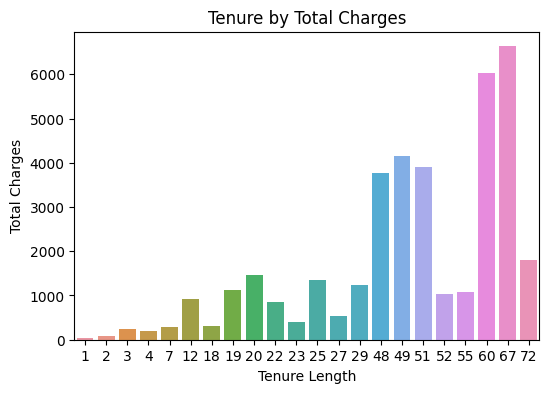

In [105]:
df_sample1 = df.sample(n=30)
tenure_churn_rate = df_sample1.groupby('tenure')['Total Charges'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=tenure_churn_rate.index, y=tenure_churn_rate.values)
plt.title('Tenure by Total Charges')
plt.ylabel('Total Charges')
plt.xlabel('Tenure Length')
plt.show()


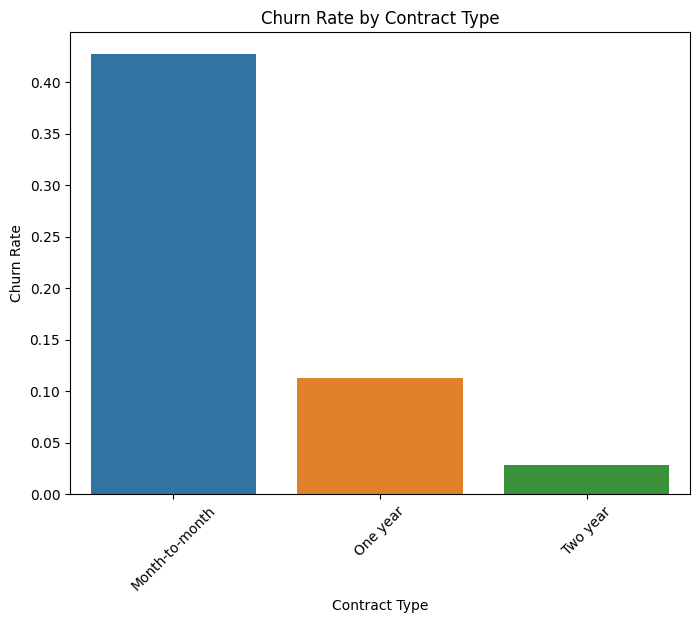

In [106]:
# Calculate churn rates for each contract type
contract_churn_rate = df.groupby('Contract')['Churn'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_churn_rate.index, y=contract_churn_rate.values)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.xticks(rotation=45)
plt.show()


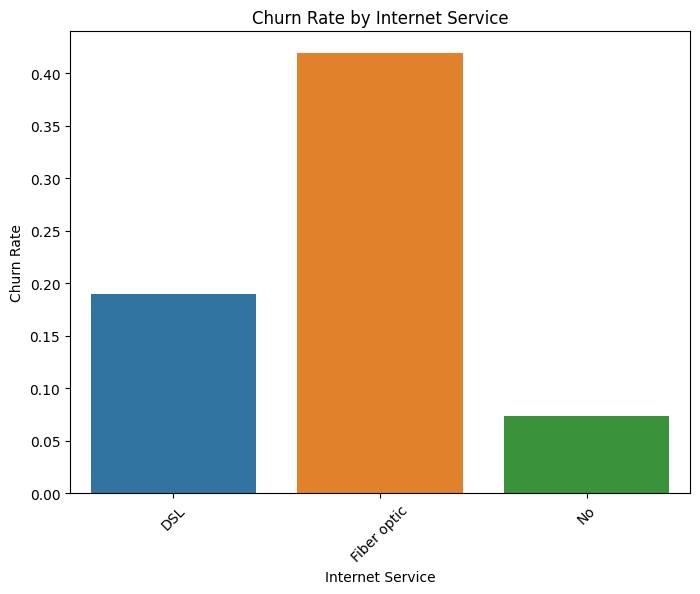

In [107]:
# Calculate churn rates for each internet service type
internet_churn_rate = df.groupby('Internet Service')['Churn'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=internet_churn_rate.index, y=internet_churn_rate.values)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.xticks(rotation=45)
plt.show()

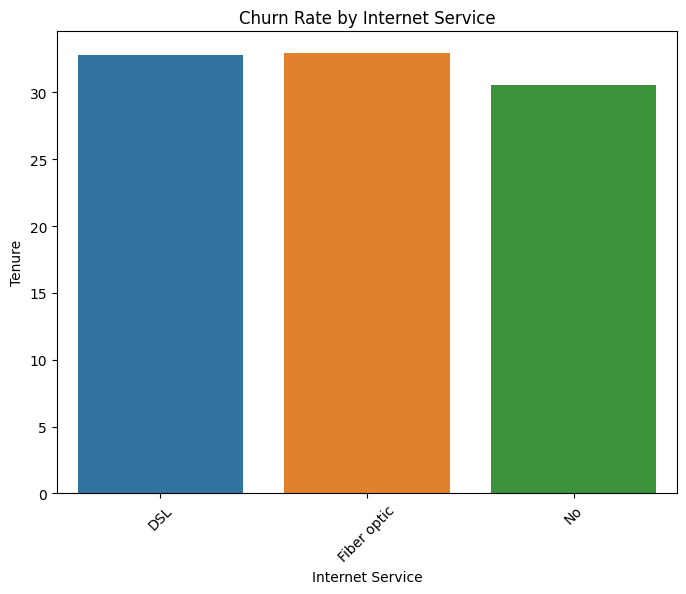

In [109]:
# Calculate churn rates for each internet service type
internet_tenture_rate = df.groupby('Internet Service')['tenure'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=internet_tenture_rate.index, y=internet_tenture_rate.values)
plt.title('Tenure by Internet Service')
plt.ylabel('Tenure')
plt.xlabel('Internet Service')
plt.xticks(rotation=45)
plt.show()

In [21]:
df['Churn'].describe()

count    7044.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Churn, dtype: float64

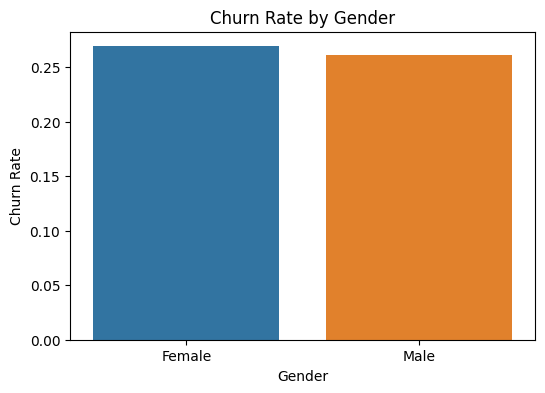

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values)
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender')
plt.show()

#shows the females have a slightly higher churn rate i guess

In [41]:
df.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


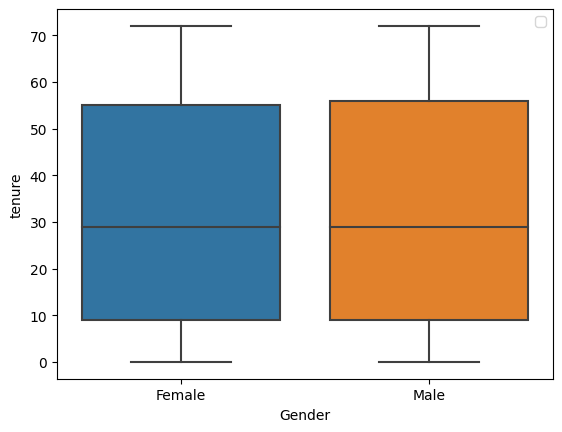

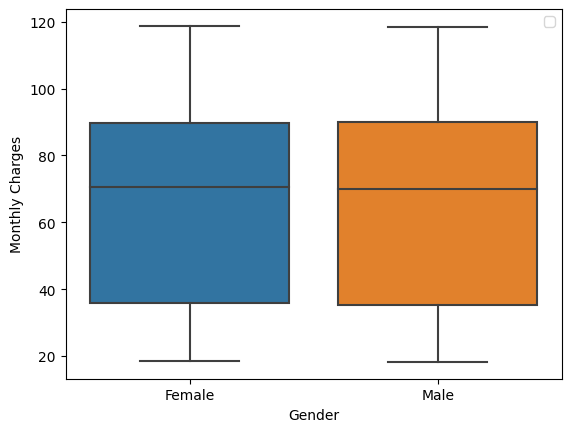

In [32]:
columns = ['tenure','Monthly Charges']
for index in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y = index)
    plt.legend()


In [33]:
print(df['Gender'].value_counts(normalize=True))
# Display the normalized count of each gender

Gender
Male      0.504685
Female    0.495315
Name: proportion, dtype: float64


In [38]:
df['Partner'] = df['Partner'].apply(lambda x:0 if x == 'No' else 1)

0       1
1       1
2       0
3       0
4       0
       ..
7039    1
7040    1
7041    1
7042    1
7043    0
Name: Partner, Length: 7044, dtype: int64

<Axes: xlabel='tenure', ylabel='Monthly Charges'>

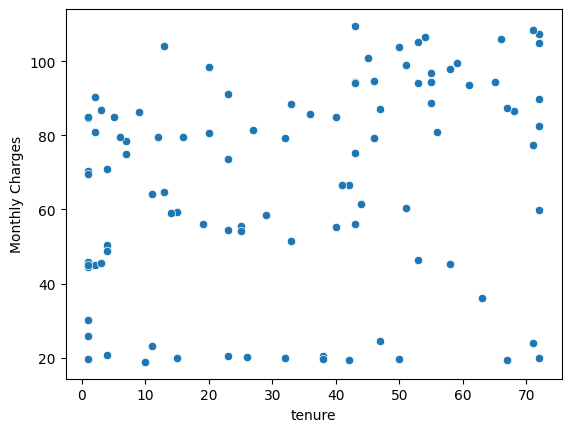

In [61]:
#Bivartiate Analysis
df_sample = df.sample(n=100)

sns.scatterplot(data = df_sample, x='tenure', y = 'Monthly Charges')

In [48]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
print(df['tenure'].isna().sum())

# Convert the 'Total Charges' column to numeric and check for NaN values
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
print(df['Total Charges'].isna().sum())

0
11


c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


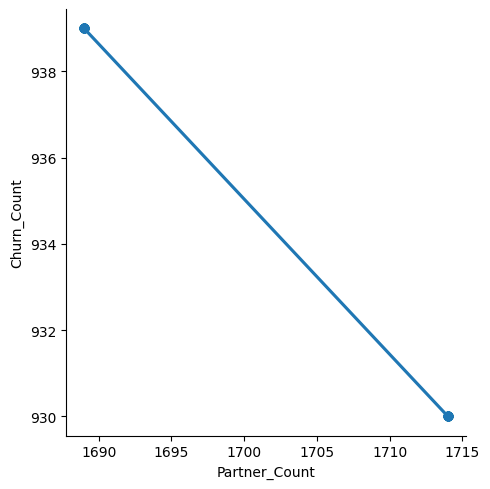

In [67]:
# Create a linear regression plot
sns.lmplot(data=df_sample, x='Partner_Count', y='Churn_Count')


c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


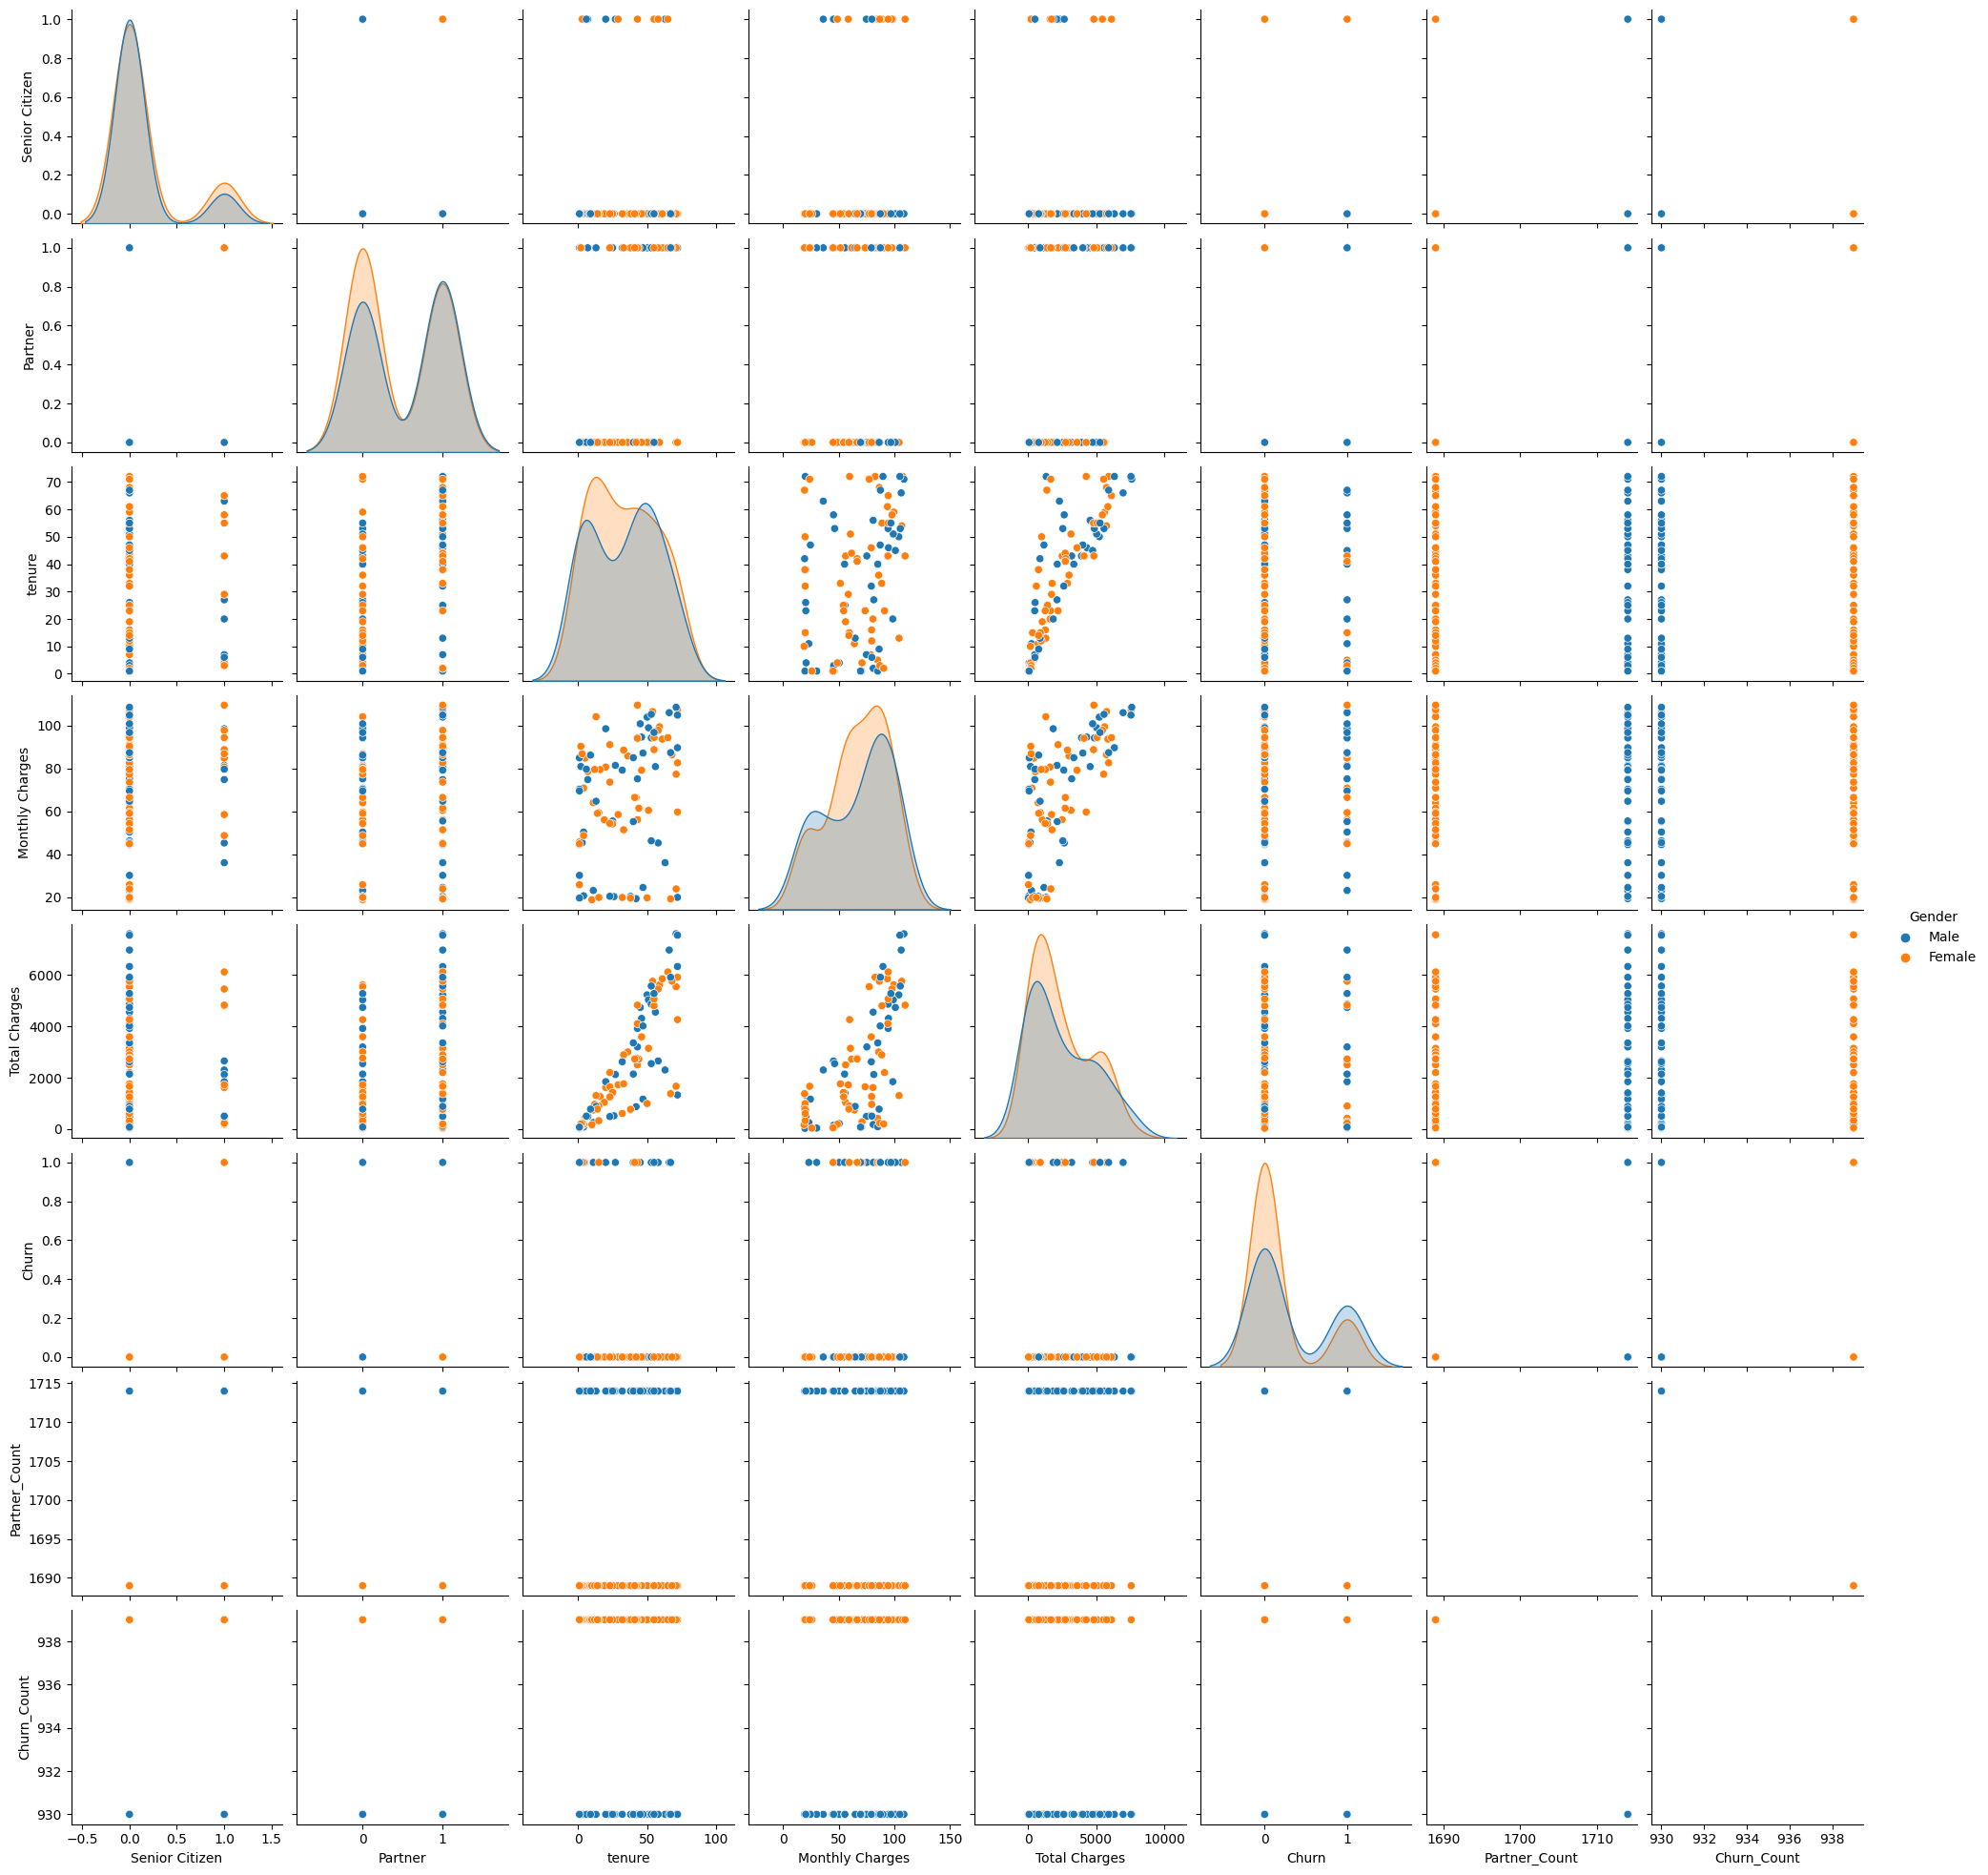

In [70]:
sns.pairplot(df_sample, hue = 'Gender')

In [53]:
df.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [55]:
df.groupby(['Gender'])[['tenure','Monthly Charges','Partner']].mean()
# Group and display mean values for different features by 'Gender'

,tenure,Monthly Charges,Partner
Gender,,,
Female,32.235598,65.194110,0.484093
Male,32.495359,64.327482,0.482138


In [56]:
# Calculate and add a new column for the count of 'Partner'
partner_count = df.groupby('Gender')['Partner'].sum()
df['Partner_Count'] = df['Gender'].map(partner_count)

# Calculate and add a new column for the count of 'Churn'
churn_count = df.groupby('Gender')['Churn'].sum()
df['Churn_Count'] = df['Gender'].map(churn_count)

In [58]:
gender_grouped = df.groupby('Gender')[['tenure', 'Monthly Charges', 'Partner']].mean()

# Display the grouped mean values with count columns
gender_grouped['Partner_Count'] = partner_count
gender_grouped['Churn_Count'] = churn_count

print(gender_grouped)

           tenure  Monthly Charges   Partner  Partner_Count  Churn_Count
Gender                                                                  
Female  32.235598        65.194110  0.484093           1689          939
Male    32.495359        64.327482  0.482138           1714          930


<Axes: >

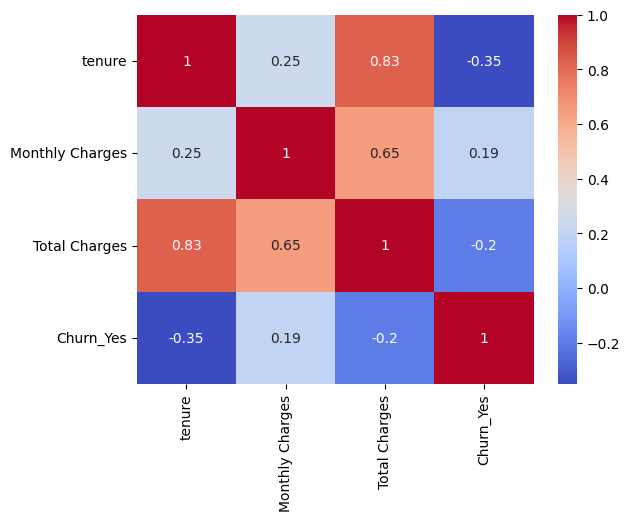

In [113]:
sns.heatmap(df1[['tenure','Monthly Charges','Total Charges','Churn_Yes']].corr(), annot=True, cmap='coolwarm')
# Calculate correlation matrix and plot a heatmap

In [109]:
df['Churn'] = df['Churn'].apply(lambda x:0 if x == 'No' else 1)
df['Churn']

0       1
1       1
2       1
3       1
4       1
       ..
7039    1
7040    1
7041    1
7042    1
7043    1
Name: Churn, Length: 7044, dtype: int64

c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


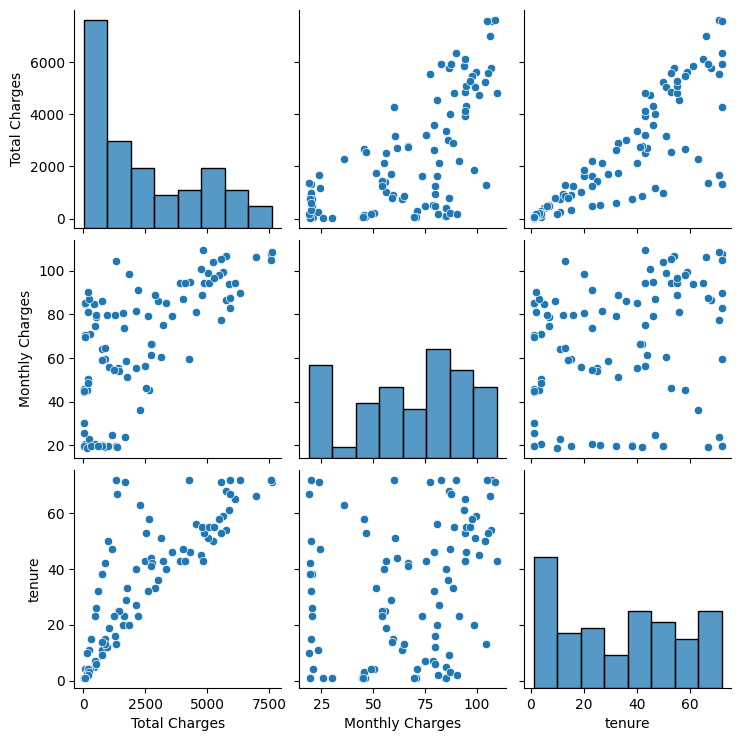

In [73]:
# Create a pair plot of Total Charges, Monthly Charges, and Tenure
sns.pairplot(data=df_sample, vars=['Total Charges', 'Monthly Charges', 'tenure'])


<Axes: xlabel='Monthly Charges', ylabel='Total Charges'>

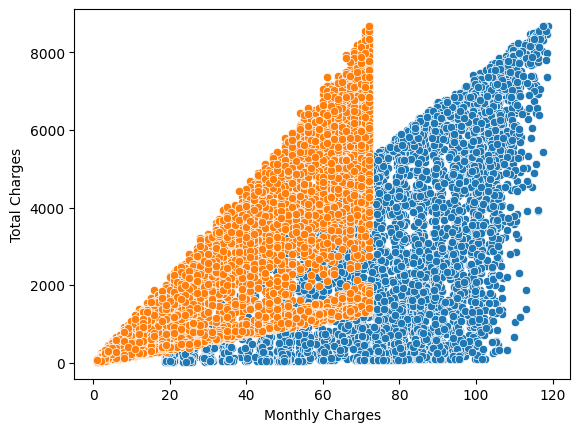

In [74]:
# Create a scatter plot of Total Charges vs Monthly Charges
sns.scatterplot(data=df, x='Monthly Charges', y='Total Charges')

# Create a scatter plot of Total Charges vs Tenure
sns.scatterplot(data=df, x='tenure', y='Total Charges')


In [68]:
churn_proportion = df.groupby('Gender')['Churn'].mean()

# Print the result
print(churn_proportion)

Gender
Female    0.269132
Male      0.261603
Name: Churn, dtype: float64


Text(0, 0.5, 'Proportion of Customers Who Churned')

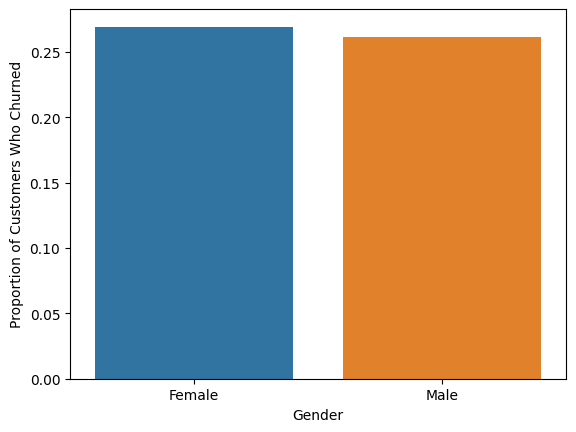

In [69]:
# Create a bar plot of the churn proportions by gender
sns.barplot(x=churn_proportion.index, y=churn_proportion.values)

# Add labels to the x and y axes
plt.xlabel('Gender')
plt.ylabel('Proportion of Customers Who Churned')


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1040
           1       0.66      0.51      0.58       369

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



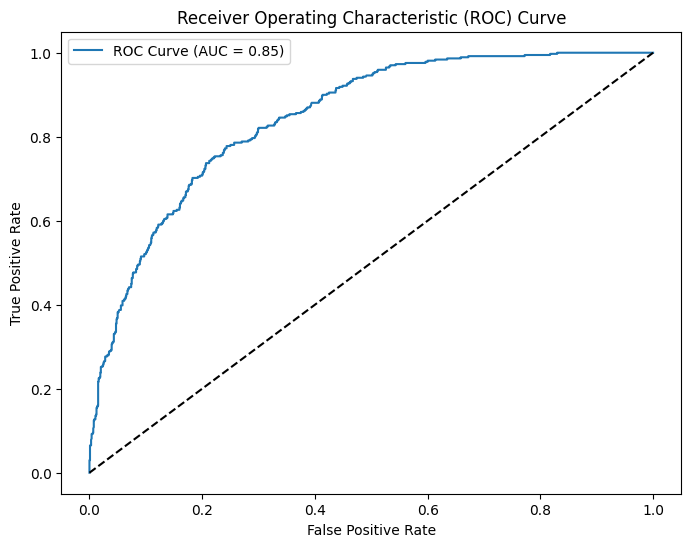

In [79]:
features = ['tenure', 'Monthly Charges', 'Partner', 'Dependents', 'Internet Service', 'Contract', 'Paperless Billing']

# Convert categorical variables to numerical
X = pd.get_dummies(df[features], drop_first=True)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred = model.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# ROC curve and AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

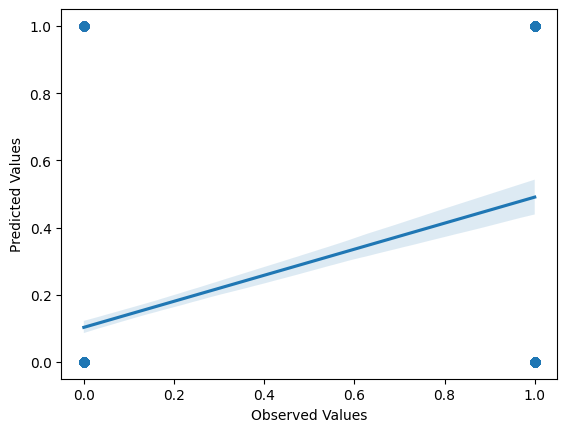

In [80]:
y_pred = model.predict(X_test)

# Create a scatter plot of observed vs predicted values
plt.scatter(y_test, y_pred)

# Add a linear regression line to the plot
sns.regplot(x=y_test, y=y_pred, scatter=False)

# Add labels to the x and y axes
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1040
           1       0.66      0.51      0.58       369

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



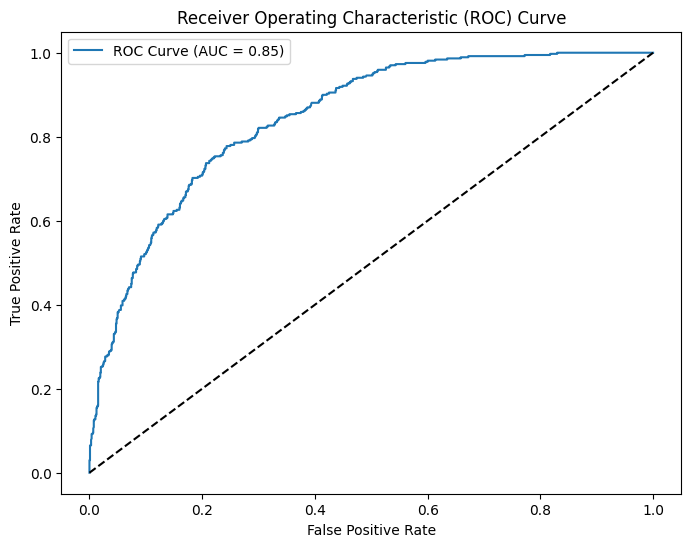

In [82]:
features = ['tenure', 'Monthly Charges', 'Partner', 'Dependents', 'Internet Service', 'Contract', 'Paperless Billing']

# Convert categorical variables to numerical
X = pd.get_dummies(df[features], drop_first=True)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on testing data
y_pred = model.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# ROC curve and AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<Axes: >

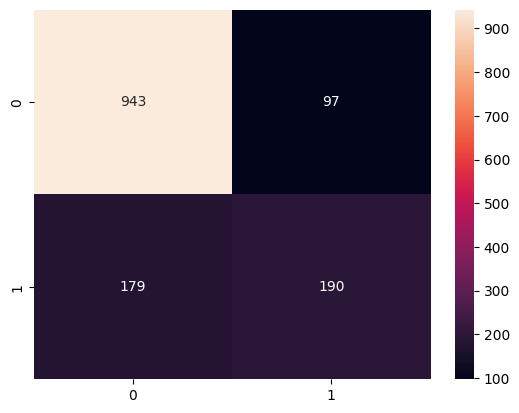

In [85]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d')

Text(0, 0.5, 'True Positive Rate')

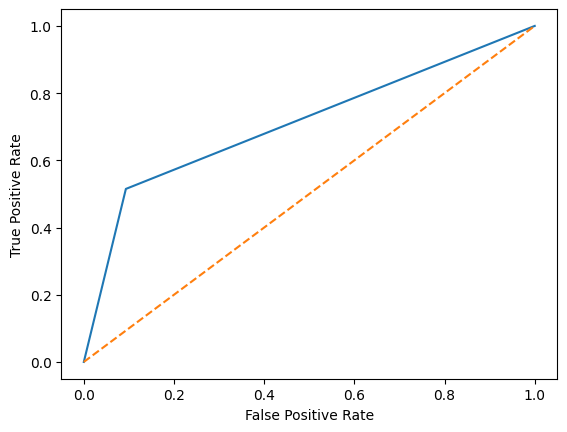

In [86]:
# Import necessary libraries
from sklearn.metrics import roc_curve

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


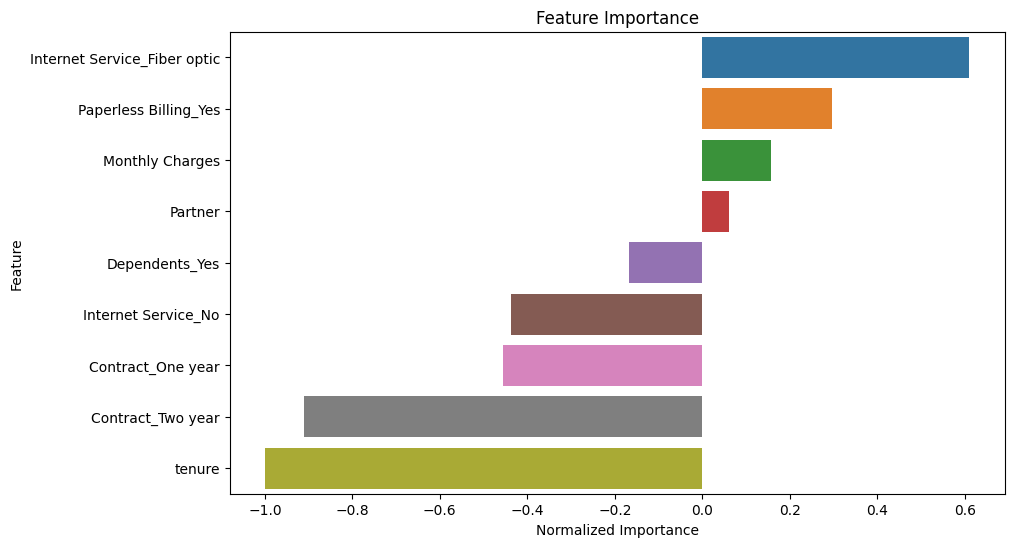

In [87]:
feature_importance = model.coef_[0]

# Normalize the coefficients for better comparison
normalized_importance = feature_importance / abs(feature_importance).max()

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': normalized_importance})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.show()

In [98]:
scale = StandardScaler()
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,Senior Citizen,tenure,Monthly Charges,Total Charges,Cluster,Churn_Cluster,Tenure_Charges_Cluster,Gender_Male,Partner_Yes,Dependents_Yes,...,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,2,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,1,29.85,29.85,1,0,2,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,0,34,56.95,1889.50,0,2,1,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,0,2,53.85,108.15,1,0,1,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0,45,42.30,1840.75,0,2,2,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [83]:
df

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Cluster
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7040,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,2
7041,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7042,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [19]:
df1 = df1[['Senior Citizen', 'tenure', 'Monthly Charges', 'Gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Churn_Yes']]
df1

,Senior Citizen,tenure,Monthly Charges,Gender_Male,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Churn_Yes
0,0,1,29.85,False,True,False,False,True,False,False,False
1,0,1,29.85,False,True,False,False,True,False,False,False
2,0,34,56.95,True,False,False,True,False,False,False,False
3,0,2,53.85,True,False,False,True,False,False,False,True
4,0,45,42.30,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7039,0,24,84.80,True,True,True,True,False,True,False,False
7040,0,72,103.20,False,True,True,True,False,True,True,False
7041,0,11,29.60,False,True,True,False,True,False,False,False
7042,1,4,74.40,True,True,False,True,False,True,True,True


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['tenure', 'Age', 'Annual Income (k$)']

for index in columns:
    plt.figure()
    sns.boxplot(data=df1, x='Gender_Male', y=index)
    plt.title(f'Box Plot of {index} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(index)
    plt.xticks([0, 1], ['Female', 'Male'])
    plt.show()


In [20]:
df1.columns

Index(['Senior Citizen', 'tenure', 'Monthly Charges', 'Gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Churn_Yes'],
      dtype='object')

In [21]:
df

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.groupby(['Gender'])[['tenure','Monthly Charges','Partner']].mean()

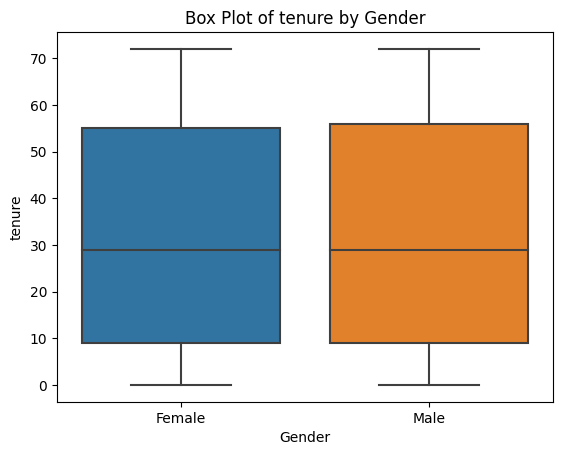

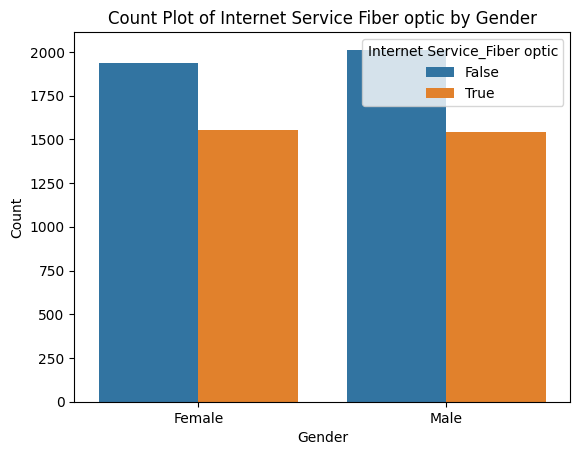

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.boxplot(data=df1, x='Gender_Male', y='tenure')
plt.title('Box Plot of tenure by Gender')
plt.xlabel('Gender')
plt.ylabel('tenure')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

plt.figure()
sns.countplot(data=df1, x='Gender_Male', hue='Internet Service_Fiber optic')
plt.title('Count Plot of Internet Service Fiber optic by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


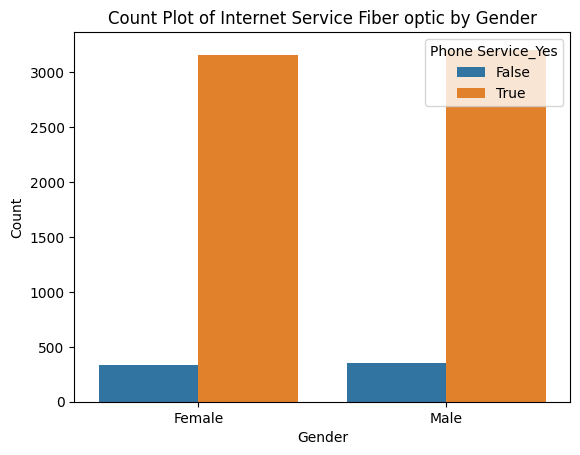

In [36]:
plt.figure()
sns.countplot(data=df1, x='Gender_Male', hue='Phone Service_Yes')
plt.title('Count Plot of Internet Service Fiber optic by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


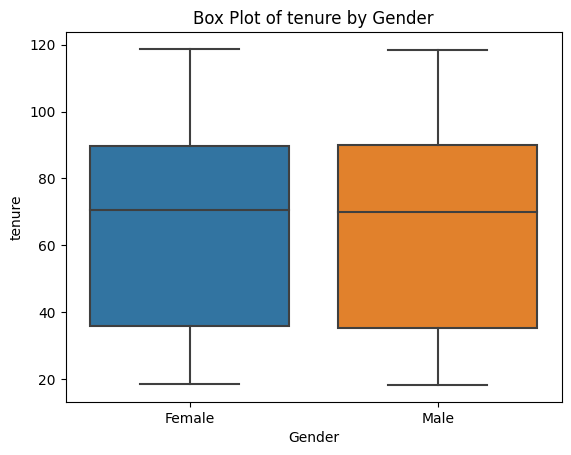

In [35]:
plt.figure()
sns.boxplot(data=df1, x='Gender_Male', y='Monthly Charges')
plt.title('Box Plot of tenure by Gender')
plt.xlabel('Gender')
plt.ylabel('tenure')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

In [87]:
clustering_churn = KMeans(n_clusters=3)
clustering_churn.fit(cluster_data)
df1['Churn_Cluster'] = clustering_churn.labels_

c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
scale = StandardScaler()
df1= pd.DataFrame(scale.fit_transform(df1))

In [74]:
df1

array([[-0.43987922, -1.27720597, -1.16012969, ..., -0.60096541,
         0.07012057, -1.06130105],
       [-0.43987922, -1.27720597, -1.16012969, ..., -0.60096541,
         0.07012057, -1.06130105],
       [-0.43987922,  0.06650579, -0.25945784, ..., -0.60096541,
         1.38376225,  1.39340413],
       ...,
       [-0.43987922, -0.87002059, -1.16843847, ..., -0.60096541,
         0.07012057, -1.06130105],
       [ 2.27335129, -1.15505036,  0.32049506, ...,  1.66398929,
         0.07012057, -1.06130105],
       [-0.43987922,  1.36949901,  1.35909267, ..., -0.60096541,
        -1.24352111,  0.16605154]])

In [38]:
# Create a new DataFrame for clustering
cluster_data = df1[['tenure', 'Internet Service_Fiber optic', 'Gender_Male']]
from sklearn.cluster import KMeans

c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

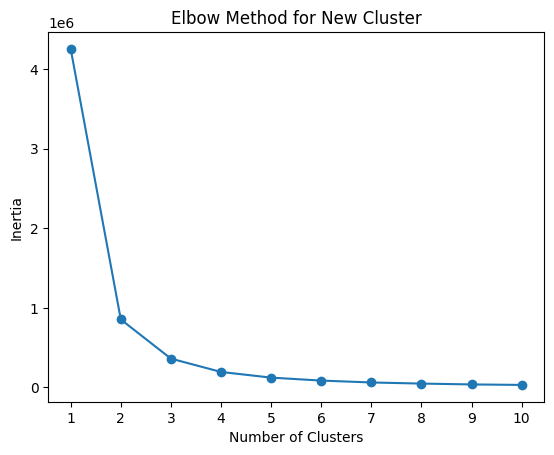

In [76]:
inertia_score_new = []
for index in range(1, 11):
    kmeans_new = KMeans(n_clusters=index)
    kmeans_new.fit(cluster_data)
    inertia_score_new.append(kmeans_new.inertia_)

plt.plot(range(1, 11), inertia_score_new, marker='o')
plt.title('Elbow Method for New Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, step=1))
plt.show()


c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


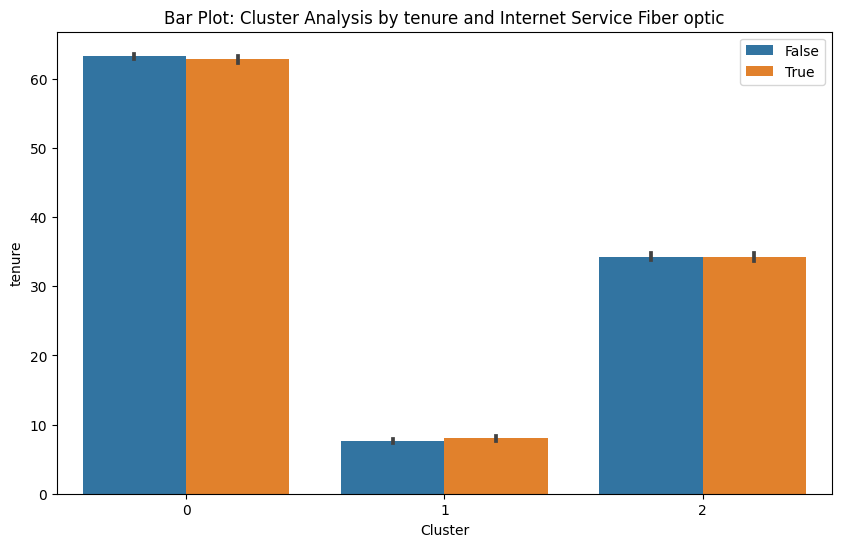

In [54]:
# Perform KMeans clustering
clustering_new = KMeans(n_clusters=3)
clustering_new.fit(cluster_data)
df1['Cluster'] = clustering_new.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Cluster', y='tenure', hue='Monc')
plt.title('Bar Plot: Cluster Analysis by tenure and Internet Service Fiber optic')
plt.xlabel('Cluster')
plt.ylabel('tenure')
plt.legend()
plt.show()

# Elbow method to find optimal number of clusters





In [60]:
cluster_stats = df1.groupby(['Cluster'])[['tenure', 'Internet Service_Fiber optic']].mean()
print(cluster_stats)

            tenure  Internet Service_Fiber optic
Cluster                                         
0        63.048682                      0.452881
1         7.799116                      0.428620
2        34.288782                      0.440687


In [63]:
cluster_data1 = df1[['tenure', 'Gender_Male', 'Churn_Yes']]

In [58]:
df1.columns

Index(['Senior Citizen', 'tenure', 'Monthly Charges', 'Gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Churn_Yes', 'Cluster'],
      dtype='object')

c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

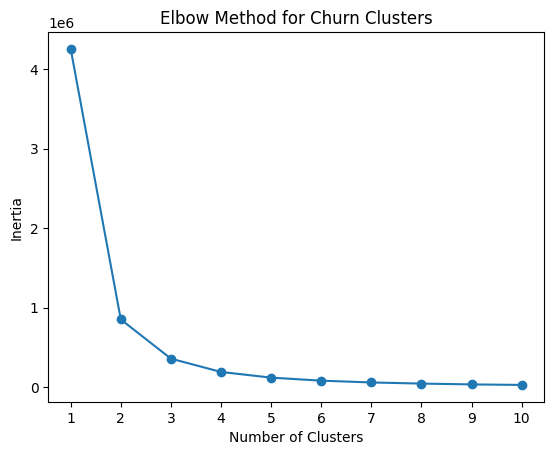

In [77]:
# Elbow method to find optimal number of clusters
inertia_score_churn = []
for index in range(1, 11):
    kmeans_churn = KMeans(n_clusters=index)
    kmeans_churn.fit(cluster_data1)
    inertia_score_churn.append(kmeans_churn.inertia_)
    
plt.plot(range(1, 11), inertia_score_churn, marker='o')
plt.title('Elbow Method for Churn Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, step=1))
plt.show()

In [80]:

# Visualize the clusters using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Churn_Cluster', y='tenure', hue='Gender_Male')
plt.title('Bar Plot: Churn Clusters by tenure')
plt.xlabel('Churn Cluster')
plt.ylabel('tenure')
plt.legend()
plt.show()

ValueError: Could not interpret input 'Churn_Cluster'

<Figure size 1000x600 with 0 Axes>

In [114]:
cluster_stats_churn = df1.groupby(['Churn_Cluster'])[['Total Charges', 'Churn_Yes']].mean()
print(cluster_stats_churn)

               Total Charges  Churn_Yes
Churn_Cluster                          
0                 448.422350   0.434526
1                4685.506364   0.095132
2                2221.845535   0.210280


c:\Users\adesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


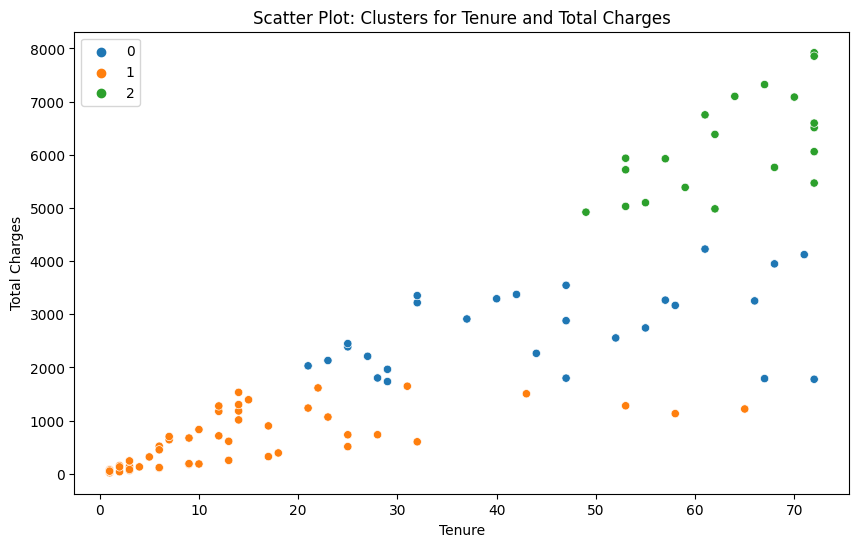

In [125]:
# Create a new DataFrame for clustering
cluster_data3 = df1_sample[['tenure', 'Total Charges']]

# Perform KMeans clustering
clustering_tenure_charges = KMeans(n_clusters=3)
clustering_tenure_charges.fit(cluster_data3)
df1_sample['Tenure_Charges_Cluster'] = clustering_tenure_charges.labels_

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_sample, x='tenure', y='Total Charges', hue='Tenure_Charges_Cluster', palette='tab10')
plt.title('Scatter Plot: Clusters for Tenure and Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.legend()
plt.show()

In [116]:
df1_sample.columns

Index(['Senior Citizen', 'tenure', 'Monthly Charges', 'Total Charges',
       'Cluster', 'Churn_Cluster', 'Tenure_Charges_Cluster', 'Gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [123]:
pd.crosstab(df1_sample['Tenure_Charges_Cluster'],df1_sample['Gender_Male'], normalize='index')

Gender_Male,False,True
Tenure_Charges_Cluster,,
0,0.484848,0.515152
1,0.516129,0.483871
2,0.472222,0.527778


In [97]:
# Replace empty or whitespace strings with NaN
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True)

# Convert 'Total Charges' column to float64
df['Total Charges'] = df['Total Charges'].astype(float)


In [99]:
df1_sample = df1.sample(n=100)